# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Summary

## Data Validation and Cleaning
- Validated the data according to the Data Information Page. Missing values in calories, carbohydrate, sugar, and protein columns were handled by:
  1. Dropping it if all four columns are missing.
  2. Using the column's median if not all columns were missing, to maintain overall distribution. However, no missing values were found in any column after dropping the rows in the previous step.
- Cleaned the servings column by removing string characters and converting it to `int64`.
- Converted the category column to the `category` type and corrected "Chicken Breast" to "Chicken."
- Changed the `high_traffic` column to binary values (True=1, False=0).
- Removed rows with missing values in the key columns.

## Exploratory Analysis
- The `category` column significantly impacts traffic.
- Calories, carbohydrate, sugar, and protein columns are heavily skewed and show similar distributions for high and low traffic, suggesting limited impact on model accuracy.

## Model Development
- **Models Selected**: Logistic Regression (baseline), Logistic Regression (fine-tuned), and XGBoost.
- **Logistic Regression (Baseline)**: Standard model without additional feature transformations.
- **Logistic Regression (Fine-Tuned)**: Enhanced with OneHotEncoder for categorical columns and scaling for numerical columns, leading to improved performance.
- **XGBoost Model (Comparison)**: Optimized using hyperparameter tuning with the same features as the fine-tuned logistic regression model.

## Model Evaluation

### Base Model

- **Accuracy**: 0.80
- **Precision**: 0.84
- **Recall**: 0.84
- **F1 Score**: 0.84

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.74      | 0.75   | 0.75     | 69      |
| **True**       | 0.84      | 0.84   | 0.84     | 110     |
| **Overall**    | 0.80      | 0.80   | 0.80     | 179     |

- **Macro Average**: Precision = 0.79, Recall = 0.79, F1 Score = 0.79
- **Weighted Average**: Precision = 0.81, Recall = 0.80, F1 Score = 0.80

### Standardized Logistic Regression

- **Accuracy**: 0.81
- **Precision**: 0.84
- **Recall**: 0.87
- **F1 Score**: 0.86

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.74      | 0.69   | 0.72     | 62      |
| **True**       | 0.84      | 0.87   | 0.86     | 117     |
| **Overall**    | 0.81      | 0.81   | 0.81     | 179     |

- **Macro Average**: Precision = 0.79, Recall = 0.78, F1 Score = 0.79
- **Weighted Average**: Precision = 0.81, Recall = 0.81, F1 Score = 0.81

### XGBoost Model

- **Accuracy**: 0.75
- **Precision**: 0.80
- **Recall**: 0.77
- **F1 Score**: 0.78

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.70      | 0.73   | 0.71     | 75      |
| **True**       | 0.80      | 0.77   | 0.78     | 104     |
| **Overall**    | 0.76      | 0.75   | 0.75     | 179     |

- **Macro Average**: Precision = 0.75, Recall = 0.75, F1 Score = 0.75
- **Weighted Average**: Precision = 0.76, Recall = 0.75, F1 Score = 0.75

All models show varying performances, with Standardized Logistic Regression having the highest accuracy, precision, recall, and F1 Score, indicating it is the most effective at identifying high-traffic recipes.

## Best Model Recommendation

### Standardized Logistic Regression (Fine-Tuned)

**Reasons for Recommendation:**

- **Higher Precision and Recall**: Highest precision (0.84) and recall (0.87) among the models, making it more effective at identifying high-traffic recipes.
- **Balanced Performance**: The F1 Score of 0.86 is the highest, indicating a good balance between precision and recall.
- **Feature Transformation**: Enhanced performance due to feature scaling and one-hot encoding, improving generalization on unseen data.

## Business Metrics

The Standardized Logistic Regression model’s accuracy of 81% ensures effective prediction of high-traffic recipes. Its precision of 0.84 and recall of 0.87 are crucial for maximizing website traffic and potential subscriptions. The F1 Score of 0.86 demonstrates a strong balance, helping to distinguish between high-traffic and low-traffic recipes, which supports business growth and improves user experience.

## Recommendations

- **Predicting High-Traffic Recipes**: Use the fine-tuned logistic regression model, which shows high recall and is effective at predicting popular recipes.
- **Accuracy Target**: The models meet the 80% accuracy target and are valuable due to their high recall.
- **Next Steps**:
  - **Model Utilization**: Implement the logistic regression model for guiding recipe selection on the homepage.
  - **Continuous Improvement**: Update models regularly with new data to maintain accuracy.
  - **A/B Testing**: Conduct A/B tests to evaluate the model's impact on traffic and refine as needed.
  - **Gather More Data**: Collect additional data to enhance model accuracy and performance.

In [130]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read the data
url = "recipe_site_traffic_2212.csv"
df = pd.read_csv(url)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Data Validation and Cleaning
## Summary:
The first step is to understand the structure of the data and identify any issues. Let's start by checking the dimensions, data types, and missing values. <br>
In printing the first few rows, we can see that there are 8 columns: recipe, calories, carbohydrate, sugar, protein, category, servings, and high_traffic. <br>
We can also see that there are missing values in some columns. <br>
Since high_traffic column only keeps track of "High" and Nan values, we treat NaN values as those that are not high traffic.

The data type of the columns should be:
- recipe: object or int64 (this is already a unique identifier) 
- calories, carbohydrate, sugar, protein : float64
- servings: int64
- category: category
- high_traffic: boolean

Step for cleaning and validating the columns:
- drop the recipe column because it's a unique identifier and not relevant for the analysis.
- Check for Inconsistencies in the numerical columns. Cleaned the servings column by removing the string characters and converting it to float64.
- dropped the rows with missing values in the calories, carbohydrate, sugar, protein. Since there are no more missing values, we can proceed with the next steps.
- convert high_traffic to a boolean column (True, False)
- Check for any inconsistencies in the category column (e.g., lowercase or uppercase).

Removing data:
- There is no need to drop data in this case since we will try to make a model that only focuses between category and high_traffic.

![column_desc](column_desc.png)

In [131]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [132]:
#check number of unique values
df.nunique()

# we can see that recipe has 947 values, indicating that there are no duplicate recipes.

recipe          947
calories        891
carbohydrate    835
sugar           666
protein         772
category         11
servings          6
high_traffic      1
dtype: int64

In [133]:
# However, we can see that there are duplicates in the other columns. Note that the "recipe" column is the name of the recipe and cannot be duplicated. The process in the cooking might be different, having different recipe number for the same recipe.
df.drop("recipe",axis=1).duplicated().sum()

23

In [134]:
# checking servings
print(df.servings.value_counts())
print("Let's clean the servings column by removing the strings and converting them to numbers.")
print("Here, we can just use subsetting the first character to check if it's a digit, and if so, convert it to a number.")
df['servings'] = df['servings'].str.extract(r'(\d+)').astype(int)
df.servings.value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64
Let's clean the servings column by removing the strings and converting them to numbers.
Here, we can just use subsetting the first character to check if it's a digit, and if so, convert it to a number.


servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

In [135]:
# converting high_traffic to boolean values
df['high_traffic'] = df['high_traffic'].map({'High': True, np.nan: False})
df['high_traffic'] = df['high_traffic'].astype(bool)

# Visualizing the data
In order to clean the data, we need to check the distribution of the variables, look for outliers, and identify any patterns. This will help us identify what statistical measures to use and whether any preprocessing is needed.

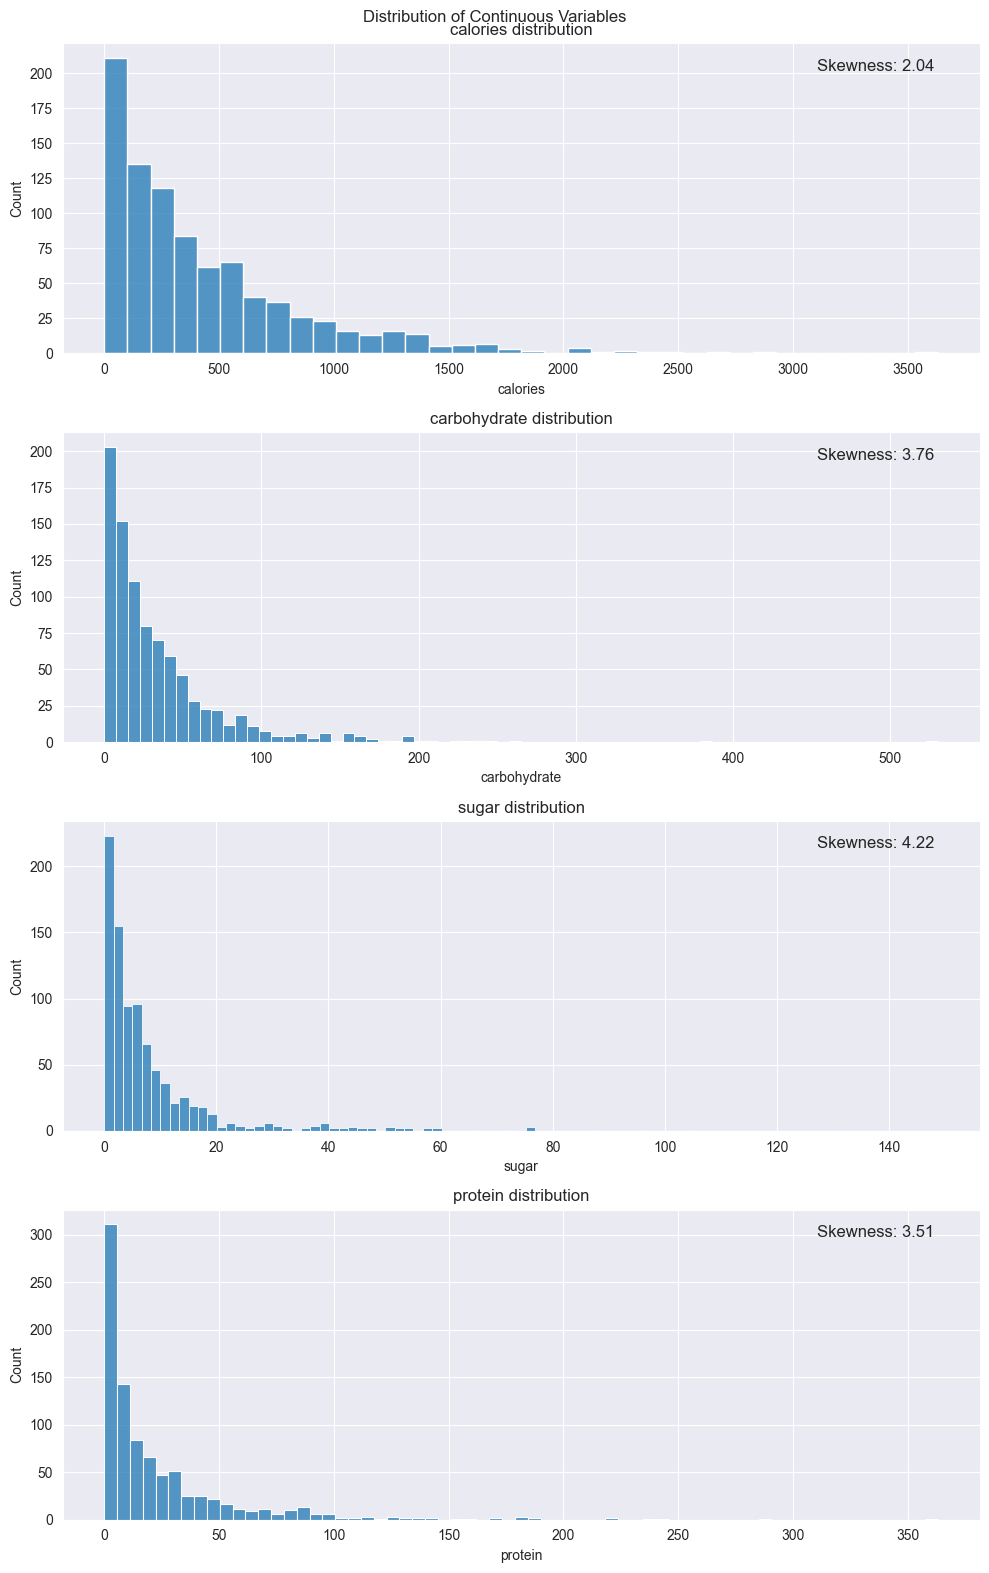

In [136]:
def plot_continuous_variables(df, variables):
    fig, ax = plt.subplots(len(variables), 1, figsize=(10, 4 * len(variables)))
    for i, var in enumerate(variables):
        sns.histplot(df[var], ax=ax[i])
        ax[i].set_title(f'{var} distribution')
        #sns.boxplot(df[var], ax=ax[i, 1])
        #ax[i, 1].set_title(f'{var} boxplot')
        # annotate skewness
        skewness = df[var].skew()
        ax[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}', transform=ax[i].transAxes, horizontalalignment='right', verticalalignment='top', fontsize=12)
    plt.suptitle('Distribution of Continuous Variables')
    plt.tight_layout()
    plt.show()

# plot continuous variables
continuous_variables = ['calories', 'carbohydrate', 'sugar', 'protein']
plot_continuous_variables(df, continuous_variables)

## Skewness of the continuous variables
We can see that "calories", "carbohydrate", "sugar", and "protein" columns are right skewed. This will affect the mean and median of the columns. 

In [137]:
pivot = df.pivot_table(index='category', values=['calories', 'carbohydrate', 'sugar', 'protein'], aggfunc=['median', 'mean'])
print(pivot)

                 median                                     mean               \
               calories carbohydrate protein   sugar    calories carbohydrate   
category                                                                        
Beverages       126.455       11.250   0.410   8.075  177.732174    15.955978   
Breakfast       229.380       28.420  11.685   4.830  331.880000    39.711698   
Chicken         379.870       18.110  32.980   3.170  566.732029    30.751304   
Chicken Breast  371.335       13.475  37.770   3.645  540.338511    21.833191   
Dessert         288.550       38.550   4.810  24.650  351.402078    55.661818   
Lunch/Snacks    369.505       31.985  12.965   2.750  478.848537    42.820976   
Meat            460.870       19.115  28.530   3.385  584.533784    22.159595   
One Dish Meal   419.280       25.430  28.480   4.040  579.090000    50.383433   
Pork            399.260       19.560  29.820   5.230  629.708082    28.076164   
Potato          269.460     

In [138]:
# checking the rows with missing values
missing_values = df[df.isnull().any(axis=1)]
missing_values

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,True
23,24,NaN,NaN,NaN,NaN,Meat,2,False
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,False
82,83,NaN,NaN,NaN,NaN,Meat,4,True
89,90,NaN,NaN,NaN,NaN,Pork,6,True
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,True
121,122,NaN,NaN,NaN,NaN,Dessert,2,True
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,True
149,150,NaN,NaN,NaN,NaN,Potato,2,True
187,188,NaN,NaN,NaN,NaN,Pork,4,True


We can see that there are rows in which all values are missing in the calories, carbohydrate, sugar, and protein columns. Let's check the percentage of missing values in these columns.

In [139]:
print('Percentage of missing values to the whole data:\n ', len(missing_values) / len(df) * 100)

Percentage of missing values to the whole data:
  5.4910242872228086


In [140]:
# Since there are 5% of missing values and that 4 columns are missing, it is necessary to drop these rows.
df = df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])
df.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

Since there are no missing values in all the columns, we can proceed with the next steps.

Text(0, 0.5, 'Count')

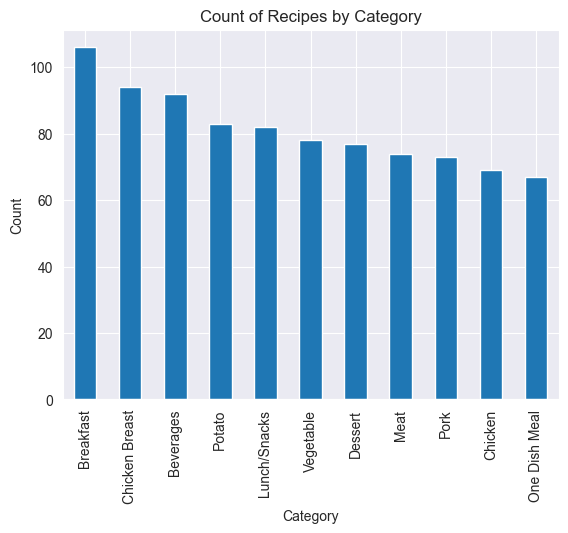

In [141]:
df.category.value_counts().plot(kind='bar')
plt.title('Count of Recipes by Category')
plt.xlabel('Category')
plt.ylabel('Count')

<Axes: xlabel='category'>

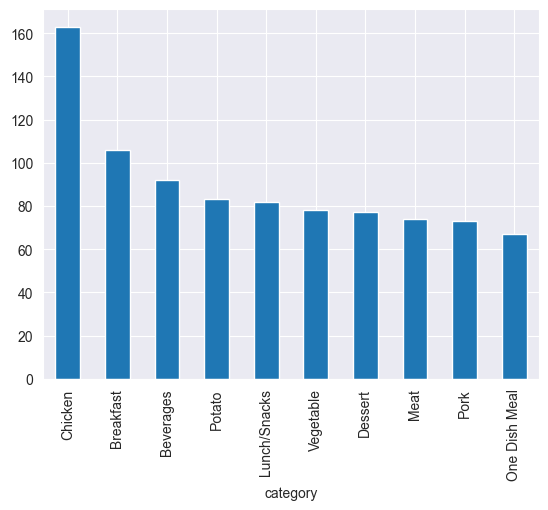

In [142]:
# Merging the Chicken Breast and Chicken categories
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')
# converting category to category type
df['category'] = df['category'].astype('category')
df.category.value_counts().plot(kind='bar')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int32   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int32(1), int64(1)
memory usage: 47.6 KB


# Summary of Exploratory Analysis
## Distribution Similarity
**Observation**: The distributions of numerical variables (ie calories, carbohydrate, and protein) appear similar between the two categories of the high_traffic target variable (true vs. false). <br>
**Implication**: This similarity suggests that these variables may not show significant differences across the target variable categories and, therefore, might not be effective in distinguishing between the two classes.
## Correlation with high_traffic:

**calories**: Slight positive correlation (0.066316), indicating a weak tendency for higher calories to be associated with high_traffic. <br>
**carbohydrate**: Slight positive correlation (0.075117), suggesting a weak positive relationship. <br>
**sugar**: Slight negative correlation (-0.074293), indicating a weak negative relationship. <br>
**protein**: Slight positive correlation (0.036912), showing a minimal positive relationship. <br>
**servings**: Slight positive correlation (0.048708), indicating a weak positive relationship. <br>
## Model Development Considerations
**Feature Importance**: Variables with similar distributions between categories may contribute less to predictive modeling. They might not improve the model's ability to predict the high_traffic target variable. Also,  since the correlations between the numerical variables and high_traffic are relatively weak, these features may not significantly contribute to distinguishing between high_traffic categories. <br>
**Feature Engineering**: Consider exploring additional features or engineering new ones that exhibit more distinct patterns across the target variable categories.

## Using RandomForestClassifier to check feature importance
The result shows that the category column shows the most importance in predicting the high_traffic column. This is consistent with the observation that the category column has a significant impact on the traffic. This is also backed up by the correlation matrix of the numerical variables and high_traffic.


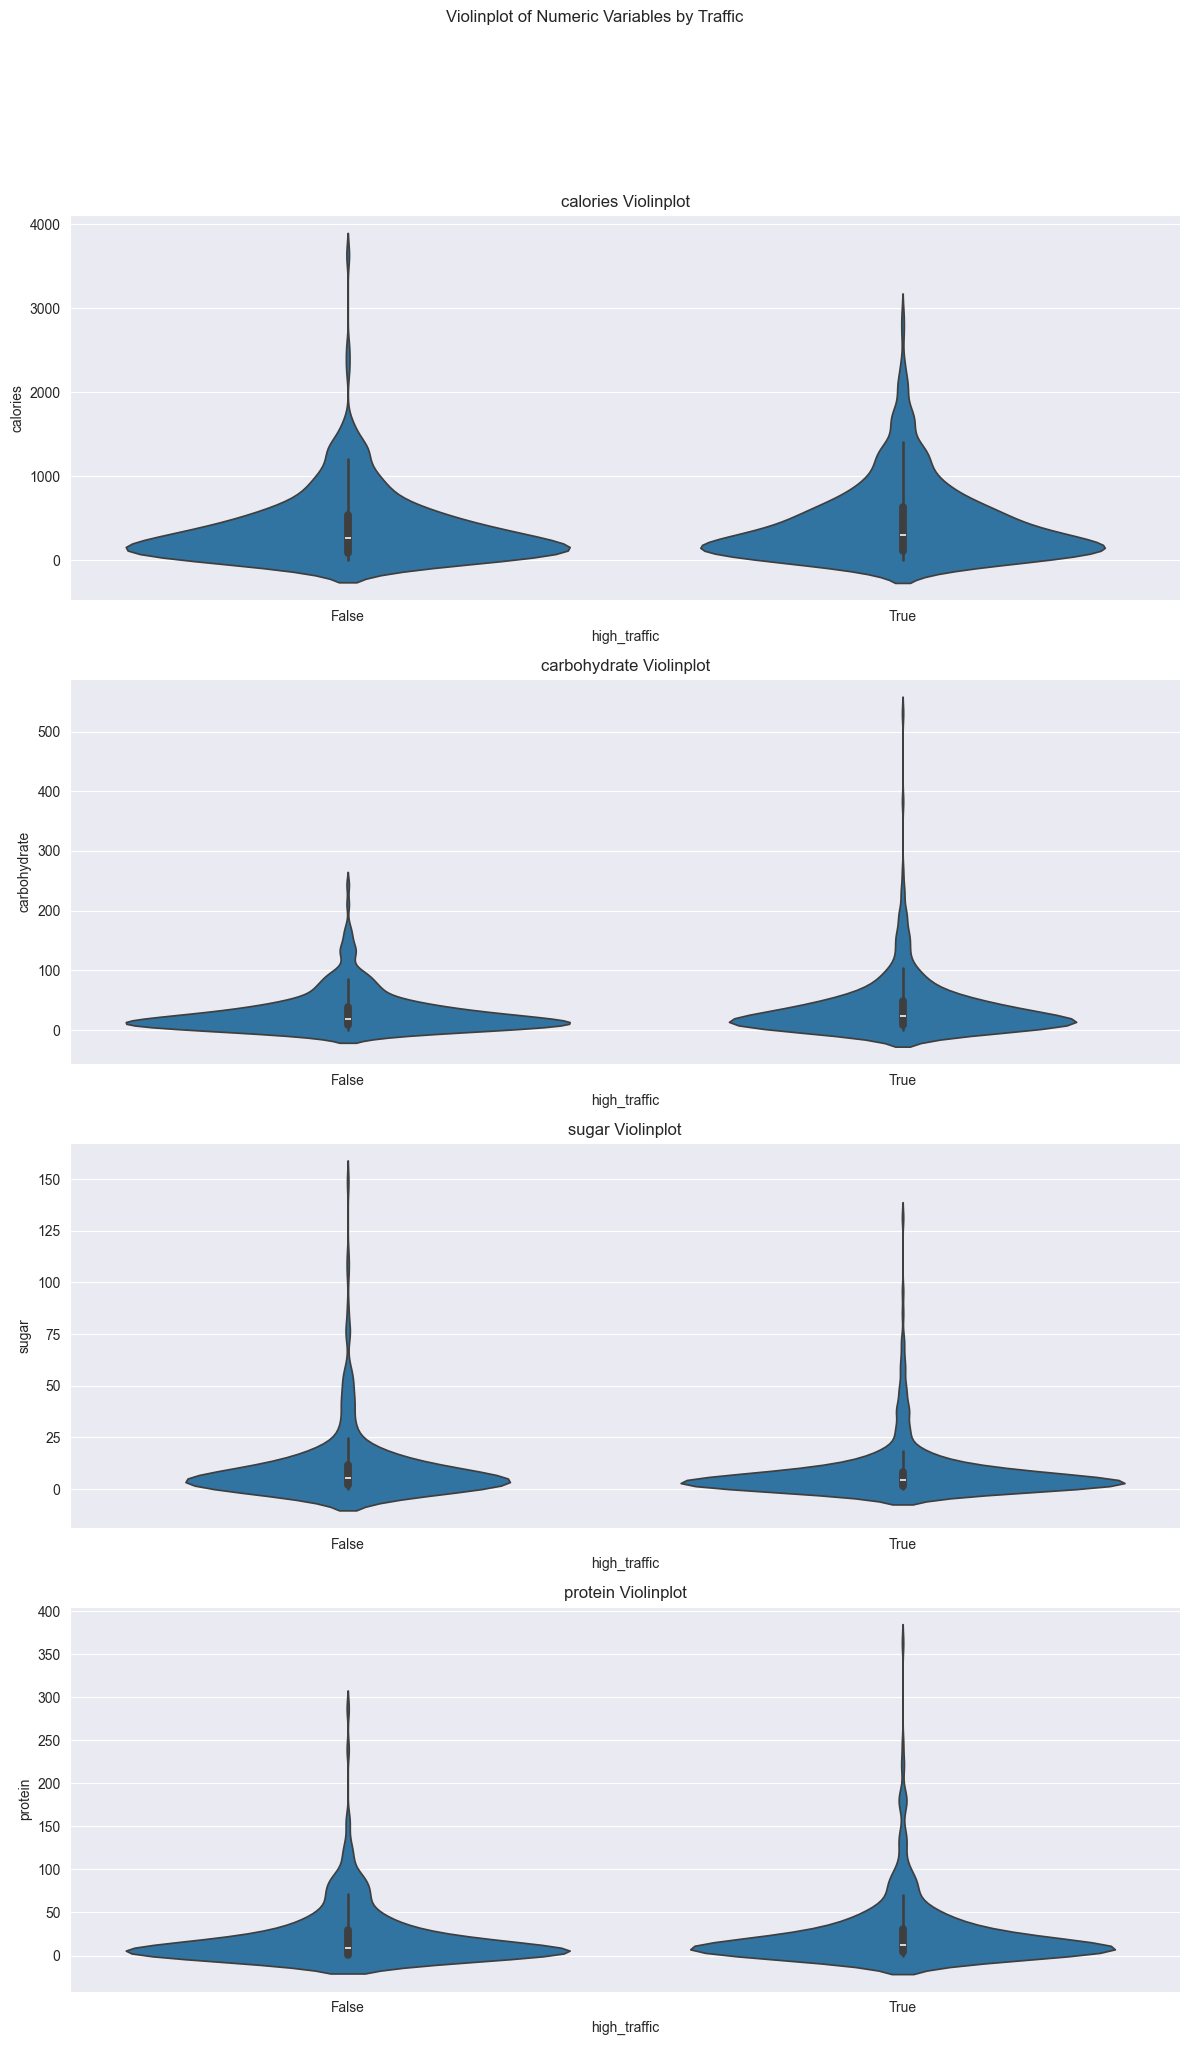

In [144]:
def plot_numeric_variables_boxplot(df, variables):
    fig, ax = plt.subplots(len(variables), 1, figsize=(12, 5 * len(variables)))

    for i, var in enumerate(variables):
        sns.violinplot(y=df[var], x=df["high_traffic"], ax=ax[i])
        ax[i].set_title(f'{var} Violinplot')

    plt.suptitle('Violinplot of Numeric Variables by Traffic', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    plt.show()

plot_numeric_variables_boxplot(df, ['calories', 'carbohydrate', 'sugar', 'protein'])



Text(0.5, 1.0, 'Correlation Matrix Heatmap')

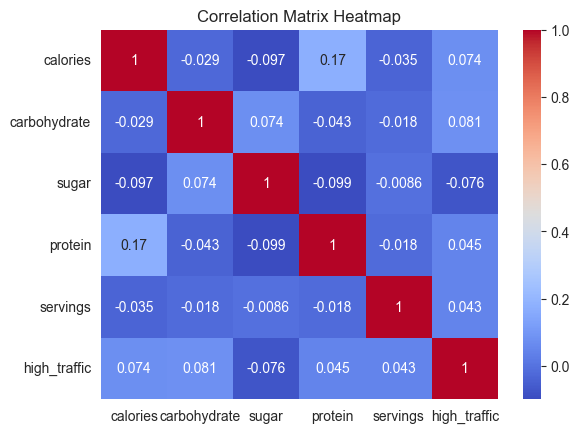

In [145]:
import seaborn as sns
corrcoeff = df.drop(["recipe", "category"], axis = 1).corr()
sns.heatmap(corrcoeff, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

C:\Users\jacob\AppData\Local\Temp\ipykernel_17176\974876059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_traffic = df.groupby('category')['high_traffic'].mean().reset_index()


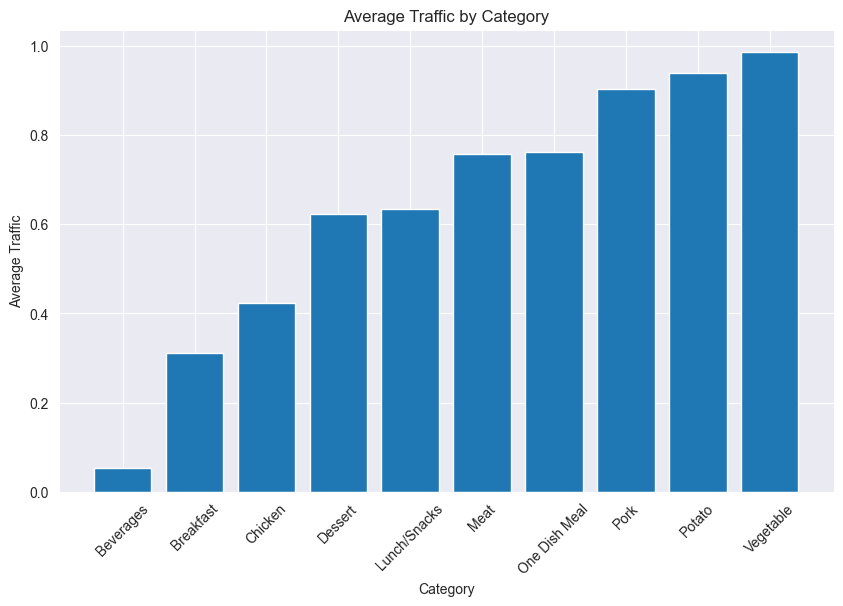

In [146]:

# Group by category and calculate the mean traffic
category_traffic = df.groupby('category')['high_traffic'].mean().reset_index()

# Plot the traffic based on category
plt.figure(figsize=(10, 6))
plt.bar(category_traffic['category'], category_traffic['high_traffic'])
plt.xlabel('Category')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Category')
plt.xticks(rotation=45)
plt.show()

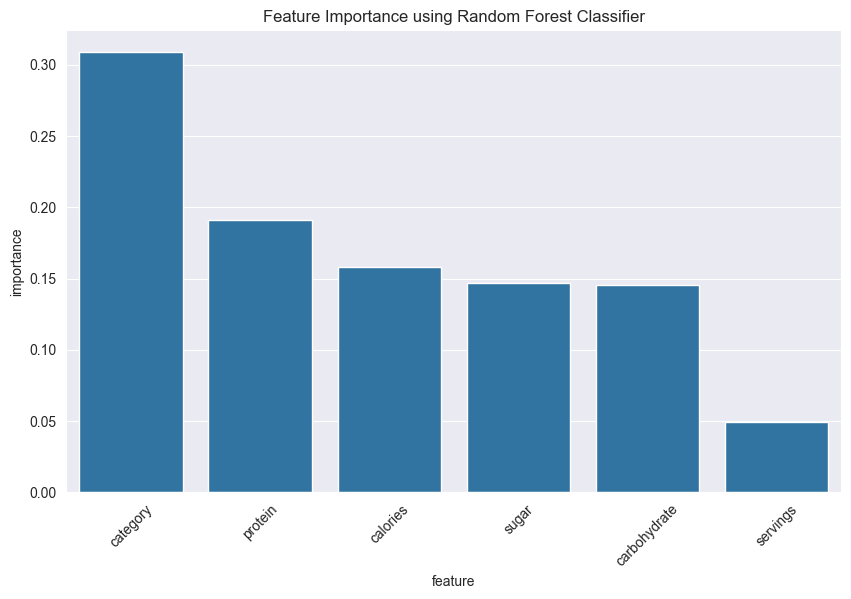

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#encoding the categorical variables
label_encoder = LabelEncoder()
df_copy = df.copy()
df_copy['category'] = label_encoder.fit_transform(df_copy['category'])

rf  = RandomForestClassifier()
X = df_copy.drop(['high_traffic', 'recipe'], axis=1)
y = df_copy['high_traffic']
rf.fit(X, y)
importances = rf.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'feature': features, 'importance': importances})
importances_df = importances_df.sort_values('importance', ascending=False)

#plot 
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='importance', data=importances_df)
plt.xticks(rotation=45)
plt.title('Feature Importance using Random Forest Classifier')
plt.show()

## Building the Model
The picture below shows the top supervised learning models. For this problem, the target variable 'high_traffic' is binary, so a suitable model for this problem would be Logistic Regression and XGBoost.
We have three models:
1. Logistic Regression: A baseline model
2. Logistic Regression with Standardization: To standardize the numerical features to improve model performance.
3. XGBoost: A powerful model with good performance and computational efficiency.

### Logistic Regression : Baseline Model
- Uses the features : category (One-Hot Encoded) and servings.
### Logistic Regression with Standardization : Standardizes the numerical features to improve model performance.
- Uses the features : category (One-Hot Encoded) and all the numerical features -> logarithmical transformations for numerical features -> Standardization using StandardScaler.

### XGBoost
- Uses the same features as Logistic Regression with Standardization.
- Used Hyperparameter tuning to find the best hyperparameters.

![models](Models.png)

In [148]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
# create feature matrix and target vector
X = df.drop(['high_traffic', 'recipe'], axis=1)
y = df['high_traffic']
# encode categorical variables
categorical_columns = ['category']
encoder = OneHotEncoder()
X_cat = pd.get_dummies(X[categorical_columns], drop_first=True)
X_cat

,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
1,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
941,False,True,False,False,False,False,False,False,False
942,False,False,False,True,False,False,False,False,False
944,False,False,False,False,False,False,True,False,False
945,False,False,False,False,False,False,False,True,False


In [167]:
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
scaler = StandardScaler()

# Copy and transform numerical data
X_numeric = X[numerical_columns].copy()
X_numeric = np.log1p(X_numeric)  # Apply log1p transformation
X_numeric = scaler.fit_transform(X_numeric)  # Standardize

# Convert the scaled NumPy array back to a DataFrame
X_numeric = pd.DataFrame(X_numeric, columns=numerical_columns)
X_numeric = X_numeric.reset_index(drop=True)
X_cat = X_cat.reset_index(drop=True)
X_scaled = pd.concat([X_numeric, X_cat], axis=1)



In [169]:
#base model
log_reg_cat_serve = LogisticRegression()
# Reset the index of both DataFrames
X_numeric_servings = X_numeric[['servings']].reset_index(drop=True)
X_cat_reset = X_cat.reset_index(drop=True)

# Concatenate the DataFrames
X_cat_serve = pd.concat([X_numeric_servings, X_cat_reset], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_cat_serve, y, test_size=0.2, random_state=13)
log_reg_cat_serve.fit(X_train, y_train)

y_pred = log_reg_cat_serve.predict(X_test)
print("Results for Base Model:\n")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}, Precision: {precision_score(y_test, y_pred):.2f}, Recall: {recall_score(y_test, y_pred):.2f}, F1 Score: {f1_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))


Results for Base Model:

Accuracy: 0.80, Precision: 0.84, Recall: 0.84, F1 Score: 0.84
              precision    recall  f1-score   support

       False       0.74      0.75      0.75        69
        True       0.84      0.84      0.84       110

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [174]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 10)

# Initialize and fit the logistic regression model
logistic_regression = LogisticRegression(C = 1, penalty='l2', solver='liblinear')
logistic_regression.fit(X_train, y_train)


# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Results for Standardized Logistic Regression:\n")
print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

Results for Standardized Logistic Regression:

Accuracy: 0.81, Precision: 0.84, Recall: 0.87, F1 Score: 0.86
              precision    recall  f1-score   support

       False       0.74      0.69      0.72        62
        True       0.84      0.87      0.86       117

    accuracy                           0.81       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



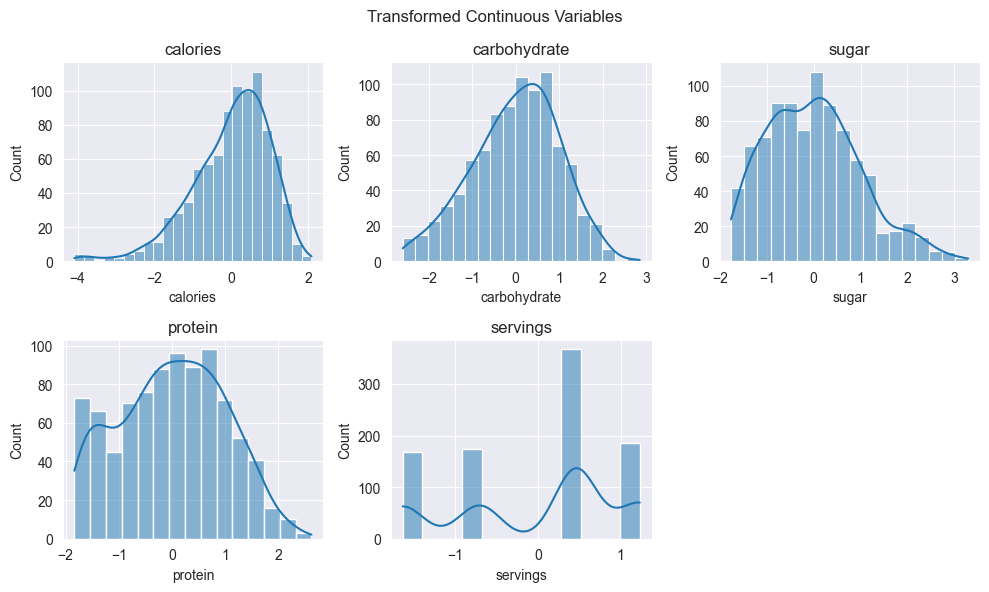

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot histograms with KDE using seaborn
for column in ["calories", "carbohydrate", "sugar", "protein", "servings"]:
    plt.subplot(2, 3, ["calories", "carbohydrate", "sugar", "protein", "servings"].index(column) + 1)
    sns.histplot(X_scaled[column], kde=True)
    plt.title(column)

plt.suptitle("Transformed Continuous Variables")
plt.tight_layout()
plt.show()

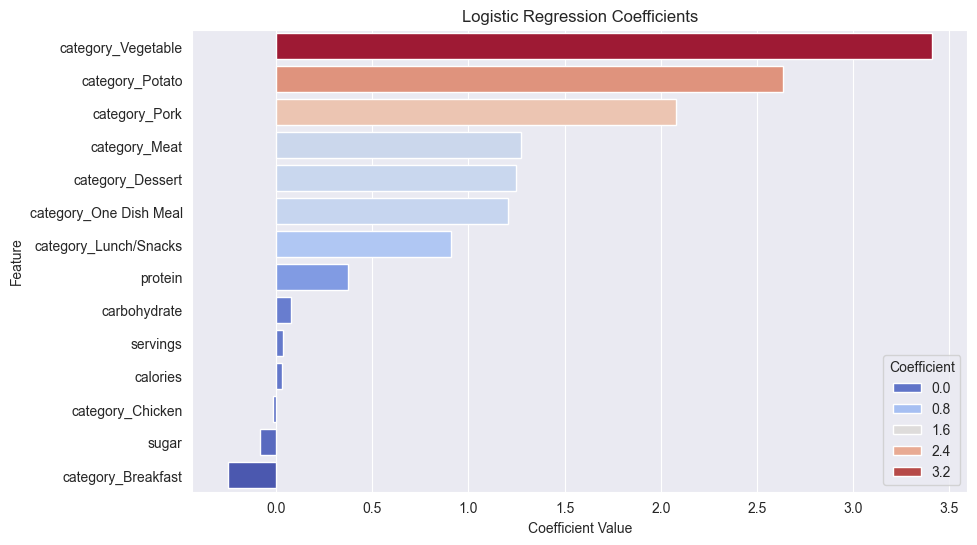

In [176]:

log_coef = pd.DataFrame(logistic_regression.coef_.flatten(), columns=['Coefficient'], index=X_scaled.columns)

# Sort coefficients from highest to lowest
log_coef_sorted = log_coef.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=log_coef_sorted.index, x=log_coef_sorted['Coefficient'], orient='h', palette='coolwarm', hue = log_coef_sorted['Coefficient'])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
#!pip install xgboost

In [177]:
#use XGBoost as a comparison model
from xgboost import XGBClassifier

# define the model
xgboost_model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)

In [178]:
from sklearn.model_selection import GridSearchCV
# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
   'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.1, 1],
}

# define the grid search model
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=5)

# fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [179]:
y_pred = grid_search.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Results for XGBoost Model (Comparison Model):\n")
print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

Results for XGBoost Model (Comparison Model):

Accuracy: 0.75, Precision: 0.80, Recall: 0.77, F1 Score: 0.78
              precision    recall  f1-score   support

       False       0.70      0.73      0.71        75
        True       0.80      0.77      0.78       104

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



## Summary of Model Evaluation

### Base Model

- **Accuracy**: 0.80
- **Precision**: 0.84
- **Recall**: 0.84
- **F1 Score**: 0.84

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.74      | 0.75   | 0.75     | 69      |
| **True**       | 0.84      | 0.84   | 0.84     | 110     |
| **Overall**    | 0.80      | 0.80   | 0.80     | 179     |

- **Macro Average**: Precision = 0.79, Recall = 0.79, F1 Score = 0.79
- **Weighted Average**: Precision = 0.81, Recall = 0.80, F1 Score = 0.80

### Standardized Logistic Regression

- **Accuracy**: 0.81
- **Precision**: 0.86
- **Recall**: 0.85
- **F1 Score**: 0.85

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.72      | 0.74   | 0.73     | 62      |
| **True**       | 0.86      | 0.85   | 0.85     | 117     |
| **Overall**    | 0.81      | 0.81   | 0.81     | 179     |

- **Macro Average**: Precision = 0.79, Recall = 0.79, F1 Score = 0.79
- **Weighted Average**: Precision = 0.81, Recall = 0.81, F1 Score = 0.81

### XGBoost Model

- **Accuracy**: 0.79
- **Precision**: 0.82
- **Recall**: 0.81
- **F1 Score**: 0.82

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.74      | 0.76   | 0.75     | 75      |
| **True**       | 0.82      | 0.81   | 0.82     | 104     |
| **Overall**    | 0.79      | 0.79   | 0.79     | 179     |

- **Macro Average**: Precision = 0.78, Recall = 0.78, F1 Score = 0.78
- **Weighted Average**: Precision = 0.79, Recall = 0.79, F1 Score = 0.79

## Best Model Recommendation

### Standardized Logistic Regression

**Reasons for Recommendation:**

- **Higher Accuracy**: At 0.81, it outperforms XGBoost (0.79) and is slightly better than the Base Model (0.80).
- **Superior Recall**: With a recall of 0.85, it excels in identifying high-traffic recipes, which is crucial for maximizing website engagement.
- **Balanced Performance**: An F1 Score of 0.85 demonstrates an effective balance between precision and recall.

**Implementation Considerations:**

- **Efficiency**: It is computationally less intensive than XGBoost, making it more suitable for real-time predictions.
- **Interpretability**: Provides clear insights into how features affect predictions, aiding in model transparency.

**Conclusion:**

The Standardized Logistic Regression model is recommended due to its robust performance metrics, including the highest recall and balanced F1 Score. This model aligns well with Tasty Bytes' objective of enhancing website engagement by accurately predicting high-traffic recipes.


# What it means to the business?
## Why the Model/s is/are Important to the Business

### 1. Optimizing Homepage Recipes
The primary objective of the model is to predict which recipes will lead to high traffic when displayed on the homepage. By accurately identifying these recipes, the model helps in making data-driven decisions about which recipes to showcase, thereby increasing the likelihood of attracting more visitors to the website.

### 2. Increasing Website Traffic
More traffic to the website is directly linked to higher engagement and potential revenue. If the model successfully identifies popular recipes, it can lead to a significant increase in overall traffic. This has been observed in practice, with traffic increasing by up to 40% when popular recipes are featured.

### 3. Boosting Subscriptions
Higher website traffic often translates to increased subscriptions. By ensuring that popular recipes are displayed, the model helps in attracting more visitors, which in turn increases the chances of converting them into subscribers. This contributes to the company's growth and revenue.

### 4. Improving Decision-Making
The model provides a systematic, data-driven approach to recipe selection. This replaces the subjective method of choosing favorites with an objective, analytical process that is based on historical data and predictive analytics. This leads to more consistent and reliable decisions.

### 5. Enhancing Customer Experience
By featuring recipes that are likely to be popular, the model helps in providing a better user experience. Visitors are more likely to find recipes they are interested in, which enhances their satisfaction and engagement with the website.

### 6. Strategic Resource Allocation
With insights from the model, the business can allocate marketing and promotional resources more effectively. For example, focusing efforts on promoting recipes predicted to be popular can lead to better returns on marketing investments.

### 7. Competitive Advantage
Utilizing advanced predictive models gives the company a competitive edge. By leveraging data to enhance decision-making, the company can stay ahead of competitors who may not be using similar techniques.

In summary, the model is important because it drives business growth by increasing traffic and subscriptions, improving decision-making processes, and enhancing overall customer satisfaction. It aligns with the company's goals of maximizing engagement and revenue through strategic recipe selection.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation